In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from datetime import datetime
import os
import sys
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Set visualization style
sns.set(style='whitegrid')

# Load the datasets

In [3]:
creditcard_path = '../data/raw/creditcard.csv'
fraud_data_path = '../data/raw/Fraud_Data.csv'
ip_country_path = '../data/raw/IpAddress_to_Country.csv'

In [5]:
# Load datasets
fraud_data = pd.read_csv(fraud_data_path)
ip_data = pd.read_csv(ip_country_path)


### Descriptive analysis

In [7]:
data = {'fraud_data': fraud_data, 'ip_data': ip_data}
for data_name, data_df in data.items():
    print(f"{data_name} shape: {data_df.shape}")

    

fraud_data shape: (151112, 11)
ip_data shape: (138846, 3)


Fraud_Data.csv contains 151,112 entries with 11 columns.

IpAddress_to_Country.csv contains 138,846 entries with 3 columns.


In [8]:
data = {'fraud_data': fraud_data, 'ip_data': ip_data}
for data_name, data_df in data.items():
    print(f"{data_name} info:")
    print(data_df.info())
    print("\n")

fraud_data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None


ip_data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------               

In [9]:
data = {'fraud_data': fraud_data, 'ip_data': ip_data}
for data_name, data_df in data.items():
    print(f"{data_name} describe:")
    print(data_df.describe())
    print("\n")

fraud_data describe:
             user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  
count  151112.000000  
mean        0.093646  
std         0.291336  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


ip_data describe:
       lower_bound_ip_address  upper_bound_ip_address
count            1.388460e+05            1.388460e+05
mean             2.724

In [10]:
data = {'fraud_data': fraud_data, 'ip_data': ip_data}
for data_name, data_df in data.items():
    print(f"{data_name} Missing Values:")
    print(data_df.isnull().sum())
    print("\n")

fraud_data Missing Values:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


ip_data Missing Values:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64




In [11]:
data = {'fraud_data': fraud_data, 'ip_data': ip_data}
for data_name, data_df in data.items():
    print(f"{data_name} duplicated values:")
    print(data_df.duplicated().sum())
    print("\n")

fraud_data duplicated values:
0


ip_data duplicated values:
0




##### I will Start will data cleanin now
###### signup_time and purchase_time are stored as strings instead of datetime.
###### ip_address is stored as a float, which should be converted to an integer.

In [12]:
#Data Cleaning
# Convert time columns to datetime format 
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])  
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Convert IP address-related columns to integers
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].astype(int)
ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].astype(int)
fraud_data['ip_address'] = fraud_data['ip_address'].astype(int)

#### Exploratory Data Analysis (EDA)

##### Univariate Analysis
###### Distribution of numerical and categorical features.

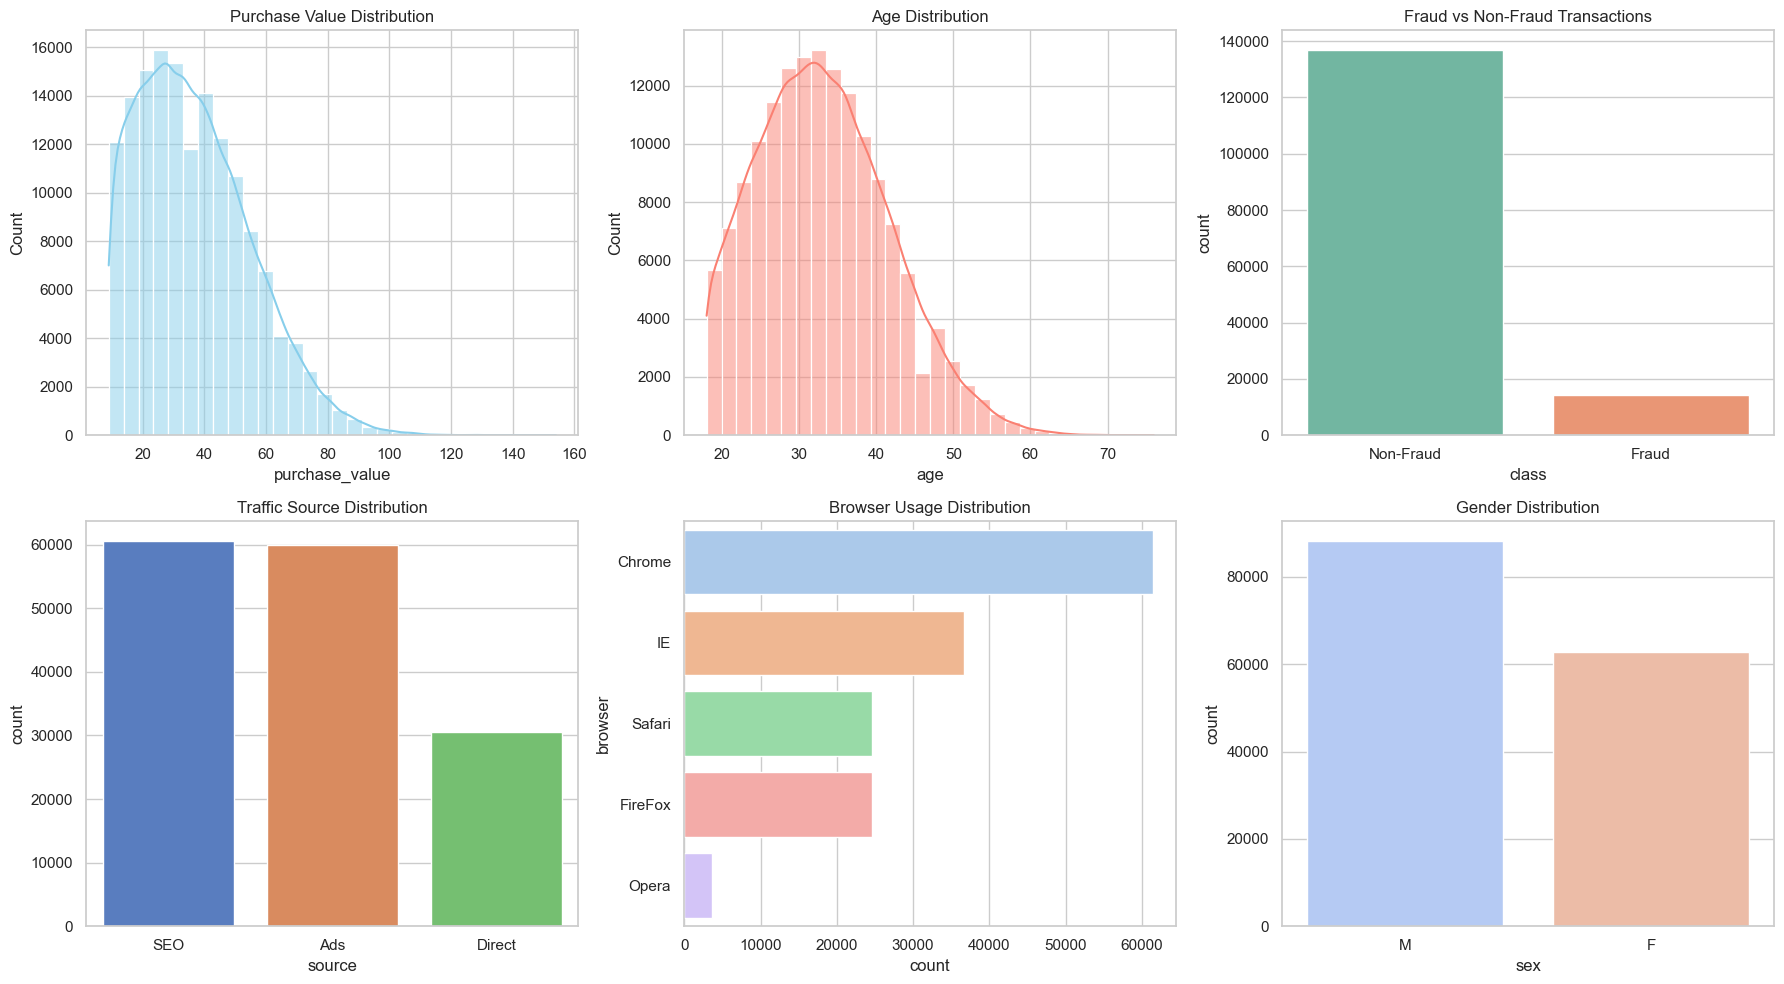

In [13]:
# Univariate Analysis: Plot distributions for numerical variables
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Purchase Value Distribution
sns.histplot(fraud_data['purchase_value'], bins=30, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Purchase Value Distribution')

# Age Distribution
sns.histplot(fraud_data['age'], bins=30, kde=True, ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Age Distribution')

# Class Distribution (Fraud vs Non-Fraud)
sns.countplot(x='class', data=fraud_data, ax=axs[0, 2], palette='Set2')
axs[0, 2].set_title('Fraud vs Non-Fraud Transactions')
axs[0, 2].set_xticklabels(['Non-Fraud', 'Fraud'])

# Source Distribution
sns.countplot(x='source', data=fraud_data, ax=axs[1, 0], palette='muted')
axs[1, 0].set_title('Traffic Source Distribution')

# Browser Distribution
sns.countplot(y='browser', data=fraud_data, order=fraud_data['browser'].value_counts().index, ax=axs[1, 1], palette='pastel')
axs[1, 1].set_title('Browser Usage Distribution')

# Gender Distribution
sns.countplot(x='sex', data=fraud_data, ax=axs[1, 2], palette='coolwarm')
axs[1, 2].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

### Bi variate Analysis

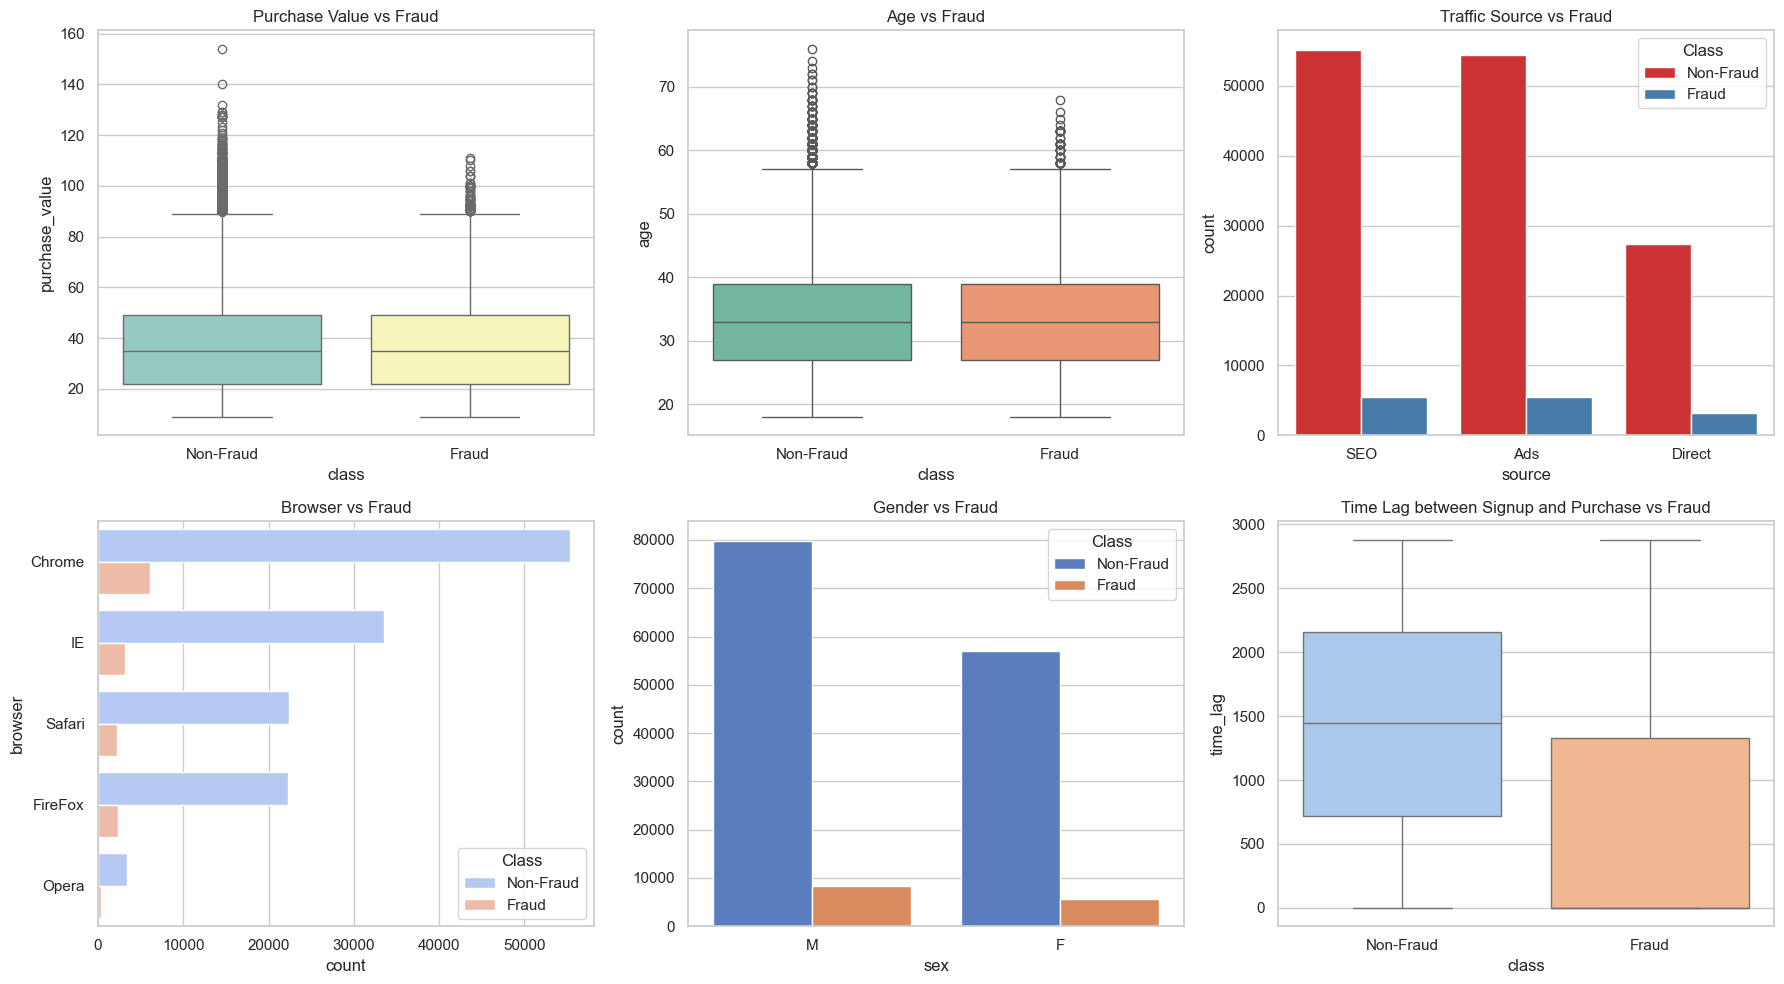

In [14]:
# Bivariate Analysis: Exploring relationships between features and fraud occurrence
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Purchase Value vs Fraud
sns.boxplot(x='class', y='purchase_value', data=fraud_data, ax=axs[0, 0], palette='Set3')
axs[0, 0].set_title('Purchase Value vs Fraud')
axs[0, 0].set_xticklabels(['Non-Fraud', 'Fraud'])

# Age vs Fraud
sns.boxplot(x='class', y='age', data=fraud_data, ax=axs[0, 1], palette='Set2')
axs[0, 1].set_title('Age vs Fraud')
axs[0, 1].set_xticklabels(['Non-Fraud', 'Fraud'])

# Source vs Fraud
sns.countplot(x='source', hue='class', data=fraud_data, ax=axs[0, 2], palette='Set1')
axs[0, 2].set_title('Traffic Source vs Fraud')
axs[0, 2].legend(title='Class', labels=['Non-Fraud', 'Fraud'])

# Browser vs Fraud
sns.countplot(y='browser', hue='class', data=fraud_data, order=fraud_data['browser'].value_counts().index, ax=axs[1, 0], palette='coolwarm')
axs[1, 0].set_title('Browser vs Fraud')
axs[1, 0].legend(title='Class', labels=['Non-Fraud', 'Fraud'])

# Gender vs Fraud
sns.countplot(x='sex', hue='class', data=fraud_data, ax=axs[1, 1], palette='muted')
axs[1, 1].set_title('Gender vs Fraud')
axs[1, 1].legend(title='Class', labels=['Non-Fraud', 'Fraud'])

# Purchase Time Lag (Time between signup and purchase) vs Fraud
fraud_data['time_lag'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds() / 3600  # in hours
sns.boxplot(x='class', y='time_lag', data=fraud_data, ax=axs[1, 2], palette='pastel')
axs[1, 2].set_title('Time Lag between Signup and Purchase vs Fraud')
axs[1, 2].set_xticklabels(['Non-Fraud', 'Fraud'])

plt.tight_layout()
plt.show()


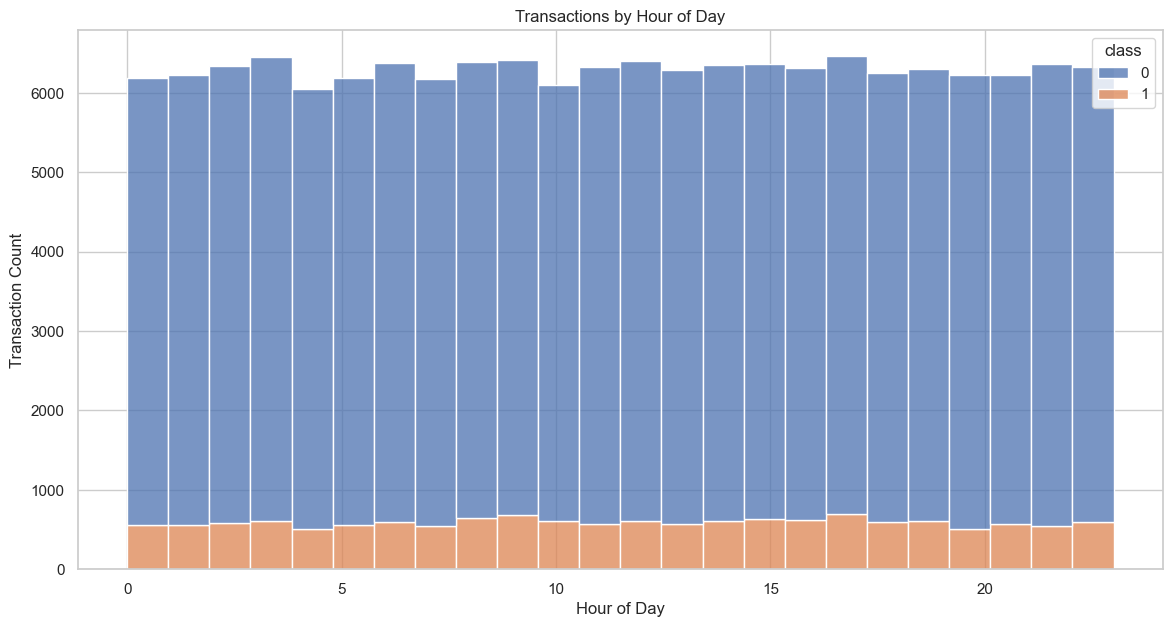

In [15]:
if 'purchase_time' in fraud_data.columns:
    plt.figure(figsize=(14, 7))
    fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
    sns.histplot(fraud_data, x='hour_of_day', hue='class', multiple='stack', bins=24)
    plt.title('Transactions by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Transaction Count')
    plt.show()

In [16]:
fraud_data= fraud_data.drop(columns=['hour_of_day', 'time_lag'])

In [17]:
fraud_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

### Merging the two datasets
Let's merge the datasets to enrich the fraud data with country information based on IP addresses.

### Approach:
We'll match each ip_address in Fraud_Data.csv to the appropriate IP range (lower_bound_ip_address to upper_bound_ip_address) in IpAddress_to_Country.csv.
After merging, we'll analyze if certain countries show higher fraud rates.

In [18]:
# IP range mapping for geolocation
ip_data = ip_data.sort_values('lower_bound_ip_address').reset_index(drop=True)
fraud_data = fraud_data.sort_values('ip_address').reset_index(drop=True)
merged_data = pd.merge_asof(fraud_data, ip_data, left_on='ip_address', right_on='lower_bound_ip_address', direction='backward')
merged_data = merged_data[(merged_data['ip_address'] >= merged_data['lower_bound_ip_address']) & 
                          (merged_data['ip_address'] <= merged_data['upper_bound_ip_address'])]
merged_data['country'] = merged_data['country'].fillna('Unknown')

In [19]:
merged_data.columns.to_list()

['user_id',
 'signup_time',
 'purchase_time',
 'purchase_value',
 'device_id',
 'source',
 'browser',
 'sex',
 'age',
 'ip_address',
 'class',
 'lower_bound_ip_address',
 'upper_bound_ip_address',
 'country']

In [20]:
mismatch = merged_data[merged_data['ip_address'] != merged_data['upper_bound_ip_address'] ]
print(f"Number of IP addresses that do not match the IP range: {mismatch.shape[0]}")

Number of IP addresses that do not match the IP range: 148848


In [21]:
merged_data[['ip_address', 'country']].head()

,ip_address,country
0,-2147483648,Singapore
1,-2147483648,Singapore
2,-2147483648,Singapore
3,-2147483648,Singapore
4,-2147483648,Singapore


In [22]:
merged_data['country'].value_counts()

country
Singapore         75936
United States     34447
China              8517
Japan              3449
United Kingdom     3051
                  ...  
Burkina Faso          1
Guadeloupe            1
Niger                 1
Reunion               1
Maldives              1
Name: count, Length: 141, dtype: int64

The IP addresses have been successfully mapped to their respective countries. Unmatched IPs are labeled as 'Unknown'.

### geolocation analysis 

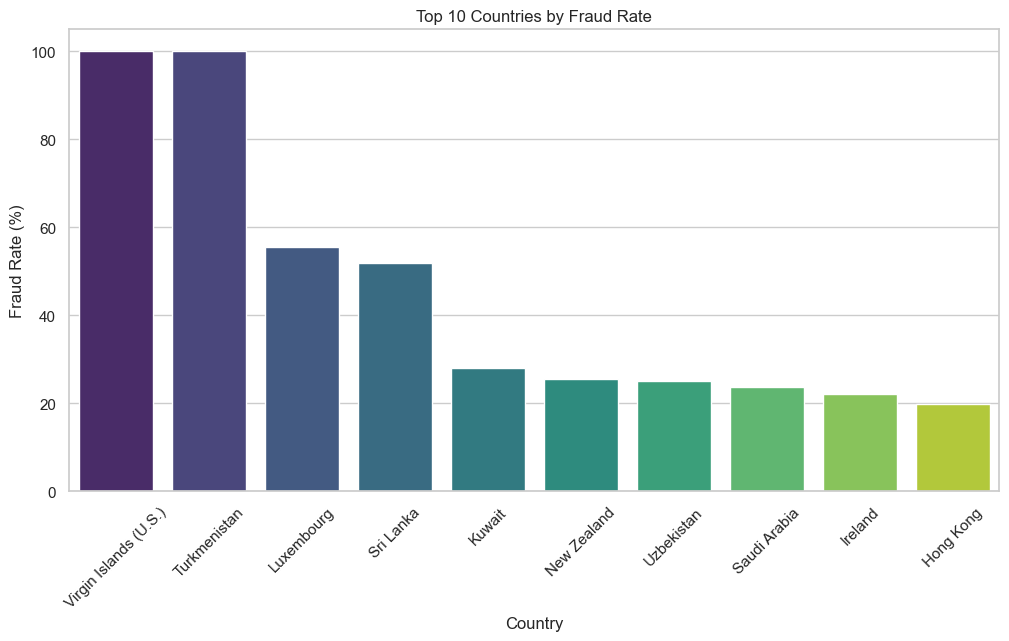

In [23]:
# Geolocation Analysis: Fraud rate by country
fraud_by_country = merged_data.groupby('country')['class'].agg(['count', 'sum'])
fraud_by_country['fraud_rate'] = fraud_by_country['sum'] / fraud_by_country['count'] * 100
fraud_by_country = fraud_by_country.sort_values('fraud_rate', ascending=False).head(10)  # Top 10 countries by fraud rate

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_by_country.index, y=fraud_by_country['fraud_rate'], palette='viridis')
plt.title('Top 10 Countries by Fraud Rate')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()


Certain countries exhibit significantly higher fraud rates compared to others.
This could point to regional patterns in fraudulent activity, useful for flagging high-risk transactions.

### feature Engineering

In [24]:
# Feature Engineering

# Calculate the total number of transactions for each user
# The 'transform' function applies the 'count' operation to each group of 'user_id'
# and returns a Series with the same index as 'merged_data'.
merged_data['transaction_count'] = merged_data.groupby('user_id')['user_id'].transform('count')

# Sort the DataFrame by 'user_id' and 'purchase_time' to ensure that the previous purchase time can be accurately referenced
merged_data = merged_data.sort_values(['user_id', 'purchase_time'])

# Create a new column 'prev_purchase_time' that captures the purchase time of the previous transaction for each user
# The 'shift(1)' function shifts the 'purchase_time' values down by one position within each user group.
merged_data['prev_purchase_time'] = merged_data.groupby('user_id')['purchase_time'].shift(1)

# Calculate 'transaction_velocity_hours', which measures the time between consecutive transactions in hours
# The difference between 'purchase_time' and 'prev_purchase_time' is calculated, converted to seconds,
# and then divided by 3600 to convert to hours.
merged_data['transaction_velocity_hours'] = (merged_data['purchase_time'] - merged_data['prev_purchase_time']).dt.total_seconds() / 3600

# Fill any NaN values in 'transaction_velocity_hours' with -1 to indicate no previous transaction
merged_data['transaction_velocity_hours'] = merged_data['transaction_velocity_hours'].fillna(-1)

# Extract the hour of the day from the 'purchase_time' and create a new column 'hour_of_day'
# This can be useful for analyzing trends in purchases based on the time of day.
merged_data['hour_of_day'] = merged_data['purchase_time'].dt.hour

# Extract the day of the week from the 'purchase_time' and create a new column 'day_of_week'
# The 'dayofweek' attribute returns an integer representation of the day (0=Monday, 6=Sunday)
merged_data['day_of_week'] = merged_data['purchase_time'].dt.dayofweek

### Final Step: Normalization and Encoding 🛠️

In [29]:
# Select features for normalization
num_features = ['purchase_value', 'age', 'transaction_count', 'transaction_velocity_hours']
scaler = MinMaxScaler()
merged_data[num_features] = scaler.fit_transform(merged_data[num_features])


# Select categorical features for encoding
cat_features = ['source', 'browser', 'sex']
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # Drop first to avoid multicollinearity

# Perform encoding
encoded_cat = encoder.fit_transform(merged_data[cat_features])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_features))

# Using label encoder for country
le = LabelEncoder()
merged_data['country_encoded'] = le.fit_transform(merged_data['country'])



# Combine with the original data
final_data = pd.concat([merged_data.reset_index(drop=True), encoded_cat_df], axis=1)

# Drop the original categorical columns and other unnecessary columns
final_data = final_data.drop(columns=cat_features + ['country', 'user_id', 'signup_time', 'purchase_time', 'prev_purchase_time', 'lower_bound_ip_address', 'upper_bound_ip_address'])
# Display the first few rows of the final dataset
final_data.head()



,purchase_value,device_id,age,ip_address,class,transaction_count,transaction_velocity_hours,hour_of_day,day_of_week,country_encoded,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,0.310345,FGBQNDNBETFJJ,0.120690,880217484,0,0.0,0.0,10,5,136,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.220690,MKFUIVOHLJBYN,0.344828,-2147483648,0,0.0,0.0,21,5,116,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.262069,SCQGQALXBUQZJ,0.120690,356056736,0,0.0,0.0,11,3,136,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.179310,MSNWCFEHKTIOY,0.017241,-2147483648,0,0.0,0.0,20,2,116,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.000000,FROZWSSWOHZBE,0.241379,578312545,0,0.0,0.0,12,3,136,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Numerical Features (purchase_value, age, transaction_count, transaction_velocity_hours) are now scaled between 0 and 1.

Categorical Features (source, browser, sex, country) are successfully One-Hot Encoded.

In [30]:
final_data.to_csv('../data/processed/final_data.csv', index=False)